In [4]:
import numpy as np
import pandas
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV

train = pandas.read_csv('/home/fma_python/dataset/train_pandas.csv',index_col=0,header=[0,1],low_memory=False)
train

,"(album, comments)","(album, date_created)","(album, date_released)","(album, engineer)","(album, favorites)","(album, id)","(album, information)","(album, listens)","(album, producer)","(album, tags)",...,"('tonnetz', 'std').3","('tonnetz', 'std').4","('tonnetz', 'std').5","(zcr, kurtosis)","(zcr, max)","(zcr, mean)","(zcr, median)","(zcr, min)","(zcr, skew)","(zcr, std)"
track_id,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009,NaN,4,1,<p></p>,6073,NaN,[],...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
3,0,2008-11-26 01:44:45,2009,NaN,4,1,<p></p>,6073,NaN,[],...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
10,0,2008-11-26 01:45:08,2008,NaN,4,6,NaN,47632,NaN,[],...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
134,0,2008-11-26 01:44:45,2009,NaN,4,1,<p></p>,6073,NaN,[],...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.000000,1.806106,0.054623
136,1,2008-11-26 01:49:19,2009,NaN,0,58,<p>A couple of unreleased mp3s from the fellas...,3331,NaN,[],...,0.076808,0.017915,0.016706,0.558770,0.147461,0.036686,0.034180,0.003418,0.805020,0.016905
139,0,2008-11-26 01:49:57,2009,NaN,1,60,"<p>A full ensamble of strings, drums, electron...",1304,NaN,[],...,0.090518,0.017428,0.021490,1.157352,0.261230,0.070760,0.066895,0.000977,0.769163,0.030017
141,0,2008-11-26 01:49:57,2009,NaN,1,60,"<p>A full ensamble of strings, drums, electron...",1304,NaN,[],...,0.145994,0.024342,0.032111,32.994659,0.415527,0.040267,0.034668,0.002930,4.204097,0.028665
145,0,2008-11-26 01:50:07,2009,NaN,0,64,<p><em>A</em>lthough recorded in Providence in...,2014,Tom Buckland,[],...,0.086215,0.020350,0.016222,3.367346,0.288574,0.070751,0.067871,0.000000,1.064697,0.029904
148,0,2008-11-26 01:50:19,2009,NaN,0,66,"<p>""Compositions for electronics and voice."" I...",1831,NaN,[],...,0.142881,0.023469,0.020913,77.361687,0.853516,0.063609,0.052734,0.000000,7.055963,0.063442


In [5]:
moments = ('mean', 'std', 'skew', 'kurtosis', 'median', 'min', 'max')
selected_columns = [('track','duration'),('track','genre_top')]
for c in train.columns:
    for m in moments:
        if m in c:
            selected_columns.append(c)

train_X = train[selected_columns]
train_Y = train[('track','genre_top')]

Let's take a look at the distribution of the training dataset

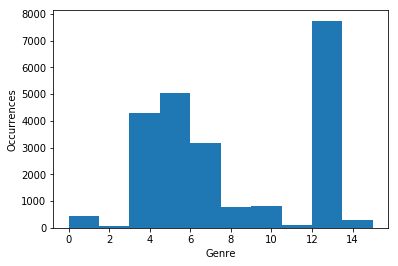

In [6]:
from matplotlib import pyplot
pyplot.hist(train[('track','genre_top')])
pyplot.xlabel("Genre")
pyplot.ylabel("Occurrences")
pyplot.show()


# Determine features and labels

# Get predictions



In [3]:
# Use a Linear classifiers (SVM, logistic regression, a.o.) with SGD training. 
from sklearn import linear_model
import numpy as np

#Introducimos log debido a que es un dataset grande
classifier = linear_model.SGDClassifier()
model0 = classifier.fit(X=train_X,y=train_Y)

/home/agu/jupyter/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


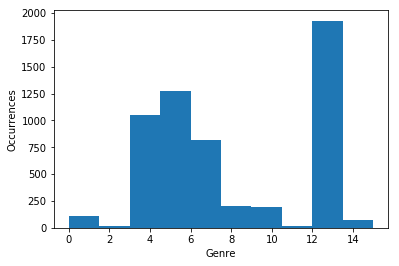

In [6]:
evaluation = pandas.read_csv('/home/fma_python/dataset/eval_pandas.csv',index_col=0,header=[0,1],low_memory=False)
# Determine features and labels
eval_X = evaluation[selected_columns]
eval_Y = evaluation[('track','genre_top')]
pyplot.hist(evaluation[('track','genre_top')])
pyplot.xlabel("Genre")
pyplot.ylabel("Occurrences")
pyplot.show()

In [9]:
# Evaluate resulting output
prediction0 = model0.predict(X=eval_X)



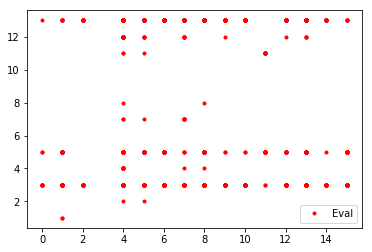

In [10]:
import matplotlib.pyplot as pyplot

pyplot.plot(eval_Y, prediction0 ,'r.',label='Eval')
pyplot.legend()
pyplot.show()


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction0)

0.30198978693431944

from sklearn.metrics import accuracy_score

accuracy_score(eval_Y, prediction0)

0.22627223102658919

In [54]:
# Define a pipeline
# standardization−> PCA−> SGD training
standard = StandardScaler(with_mean=True,with_std=True)
pca = PCA(n_components=400)
classifier = linear_model.SGDClassifier()
pipeline = Pipeline(steps=[('stand',standard),('PCA',pca),('SGD training',classifier)])

/home/agu/jupyter/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [56]:

model1 = pipeline.fit(train_X,train_Y)
prediction1 = model1.predict(eval_X)

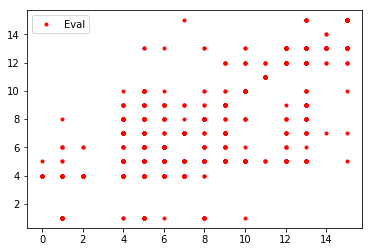

In [57]:
pyplot.plot(eval_Y, prediction1 ,'r.',label='Eval')
pyplot.legend()
pyplot.show()


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction1)

0.7430885719316781

from sklearn.metrics import accuracy_score

accuracy_score(eval_Y, prediction1)

0.7430885719316781

In [15]:
# Define a pipeline
# standardization−> PCA−> Linear Model
standard = StandardScaler(with_mean=True,with_std=True)
pca = PCA(n_components=450)
classifier = linear_model.SGDClassifier()
pipeline = Pipeline(steps=[('standardizer',standard),('PCA',pca),('SGD training',classifier)])
# To get the name of the parameters run
# pipeline.getParams ( )
pipeline.get_params()

/home/agu/jupyter/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


{'PCA': PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': 450,
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'SGD training': SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
        shuffle=True, tol=None, verbose=0, warm_start=False),
 'SGD training__alpha': 0.0001,
 'SGD training__average': False,
 'SGD training__class_weight': None,
 'SGD training__epsilon': 0.1,
 'SGD training__eta0': 0.0,
 'SGD training__fit_intercept': True,
 'SGD training__l1_ratio': 0.15,
 'SGD training__learning_rate': 'optimal',
 'SGD training__loss': 'hinge',
 'SGD training__max_iter': 5,
 'SGD training_

OJO CON EL SIGUIENTE FITTING 1:25min aprox
Fitting 5 folds for each of 30 candidates, totalling 150 fits

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 19.2min
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed: 63.9min finished


In [63]:
# Define 10 values from 1e−6 to 1
alphas = numpy.logspace(-6, 0, 10)
iterations=[100]
penalty=['l2', 'l1', 'elasticnet']
params = {'SGD training__alpha': alphas,'SGD training__max_iter': iterations,'SGD training__penalty': penalty}
scoring = {'Accuracy': make_scorer(accuracy_score)}
clf = GridSearchCV(estimator=pipeline,param_grid=params,n_jobs=4,verbose=True,cv=5,scoring=scoring,refit='Accuracy')
model2=clf.fit(train_X,train_Y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 19.2min
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed: 63.9min finished


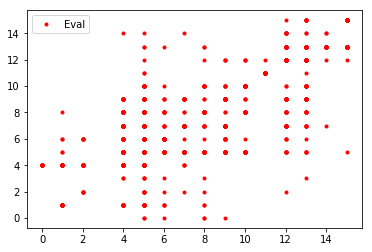

In [66]:

prediction2 = model2.predict(eval_X)
pyplot.plot(eval_Y, prediction2 ,'r.',label='Eval')
pyplot.legend()
pyplot.show()

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction2)

0.78358865997534777

from sklearn.metrics import accuracy_score

accuracy_score(eval_Y, prediction2)

0.78358865997534777

In [71]:
best = model2.best_estimator_
best.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SGD training', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0...='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])>

In [72]:
model2.score


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SGD training', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'SGD training__alpha': array([  1.00000e-06,   4.64159e-06,   2.15443e-05,   1.00000e-04,
         4.64159e-04,   2.15443e-03,   1.00000e-02,   4.64159e-02,
         2.15443e-01,   1.00000e+00]), 'SGD training__max_iter': [100], 'SGD training__penalty': ['l2', 'l1', 'elasticnet']},
       pre_dispatch='2*n_jobs', refit='Accuracy', return_train_score=True,
       scoring={'Accuracy': make_scorer(accuracy_scor

In [74]:
model2.cv_results_

{'mean_fit_time': array([  58.03728943,  132.43650894,  140.06118021,   42.40224118,
         129.0850668 ,  140.88481212,   44.12705774,  129.93062515,
         138.64936905,   44.6991569 ,  128.01579533,  134.84813085,
          46.00731449,  124.08210278,  134.03755655,   43.94778018,
         117.57643414,  128.26800489,   47.11971736,  112.63200803,
         121.75933423,   48.05491514,  114.29234605,  119.44682717,
          49.09261804,  119.04859281,  122.43942351,   50.17573428,
         118.23935061,  104.81351185]),
 'mean_score_time': array([ 0.58036814,  0.44744391,  0.41085339,  0.40767474,  0.44140134,
         0.51238613,  0.38752599,  0.34197721,  0.43785706,  0.38350778,
         0.38183584,  0.38240747,  0.35976706,  0.38333983,  0.46917205,
         0.45339947,  0.45587668,  0.46741695,  0.38392735,  0.34767017,
         0.39803853,  0.40408115,  0.38993058,  0.40377541,  0.36619477,
         0.38084393,  0.36606512,  0.33917007,  0.37148318,  0.28686943]),
 'mean_t

In [84]:
from sklearn.ensemble import ExtraTreesClassifier
standard = StandardScaler(with_mean=True,with_std=True)
pca = PCA(n_components=450)
classifier3 = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
pipeline3 = Pipeline(steps=[('standardizer',standard),('PCA',pca),('Extreme Random Forest',classifier3)])
pipeline3.get_params()

{'Extreme Random Forest': ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
 'Extreme Random Forest__bootstrap': False,
 'Extreme Random Forest__class_weight': None,
 'Extreme Random Forest__criterion': 'gini',
 'Extreme Random Forest__max_depth': None,
 'Extreme Random Forest__max_features': 'auto',
 'Extreme Random Forest__max_leaf_nodes': None,
 'Extreme Random Forest__min_impurity_decrease': 0.0,
 'Extreme Random Forest__min_impurity_split': None,
 'Extreme Random Forest__min_samples_leaf': 1,
 'Extreme Random Forest__min_samples_split': 2,
 'Extreme Random Forest__min_weight_fraction_leaf': 0.0,
 'Extreme Random Forest__n_estimator

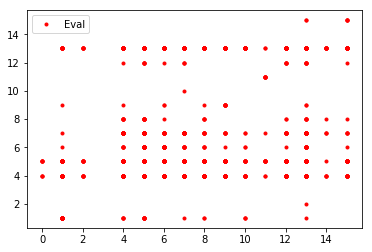

In [87]:
model3=pipeline3.fit(train_X,train_Y)
prediction3 = model3.predict(eval_X)
pyplot.plot(eval_Y, prediction3 ,'r.',label='Eval')
pyplot.legend()
pyplot.show()

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction3)

0.44338792040852265

from sklearn.metrics import accuracy_score

accuracy_score(eval_Y, prediction3)

0.44338792040852265

In [98]:
from sklearn.ensemble import ExtraTreesClassifier
standard = StandardScaler(with_mean=True,with_std=True)
pca = PCA(n_components=450)
classifier4 = ExtraTreesClassifier(random_state=0)
pipeline4 = Pipeline(steps=[('standardizer',standard),('PCA',pca),('Extreme Random Forest',classifier4)])


In [102]:
n_estimators=[10,40,100]
criterion=['gini','entropy']
params = {'Extreme Random Forest__n_estimators': n_estimators,'Extreme Random Forest__criterion': criterion}
scoring = {'Accuracy': make_scorer(accuracy_score)}
clf = GridSearchCV(estimator=pipeline4,param_grid=params,n_jobs=4,verbose=True,cv=5,scoring=scoring,refit='Accuracy')
model4=clf.fit(train_X,train_Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  4.5min finished


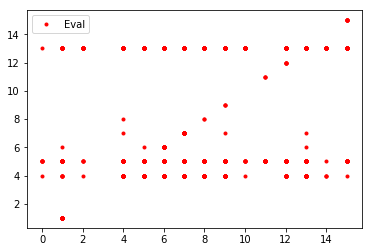

In [105]:
prediction4 = model4.predict(eval_X)
pyplot.plot(eval_Y, prediction4 ,'r.',label='Eval')
pyplot.legend()
pyplot.show()

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction4)

0.55062511005458703

from sklearn.metrics import accuracy_score

accuracy_score(eval_Y, prediction4)

0.55062511005458703

In [112]:
from sklearn.ensemble import RandomForestClassifier
standard = StandardScaler(with_mean=True,with_std=True)
pca = PCA(n_components=450)
classifier5 = RandomForestClassifier(random_state=0)
pipeline5 = Pipeline(steps=[('standardizer',standard),('PCA',pca),('Random Forest',classifier5)])
pipeline5.get_params()

{'PCA': PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': 450,
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'Random Forest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=0, verbose=0, warm_start=False),
 'Random Forest__bootstrap': True,
 'Random Forest__class_weight': None,
 'Random Forest__criterion': 'gini',
 'Random Forest__max_depth': None,
 'Random Forest__max_features': 'auto',
 'Random Forest__max_leaf_nodes': None,
 'Random Forest__min_impurity_decrease':

In [113]:
n_estimators=[10,40,100]
criterion=['gini','entropy']
params = {'Random Forest__n_estimators': n_estimators,'Random Forest__criterion': criterion}
scoring = {'Accuracy': make_scorer(accuracy_score)}
clf = GridSearchCV(estimator=pipeline5,param_grid=params,n_jobs=4,verbose=True,cv=5,scoring=scoring,refit='Accuracy')
model5=clf.fit(train_X,train_Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 18.8min finished


OJO 20 minutos
Fitting 5 folds for each of 6 candidates, totalling 30 fits

[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 18.8min finished


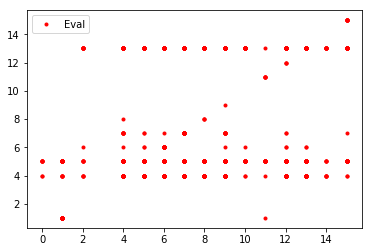

In [117]:
prediction5 = model5.predict(eval_X)
pyplot.plot(eval_Y, prediction5 ,'r.',label='Eval')
pyplot.legend()
pyplot.show()

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction5)

0.61489698890649758

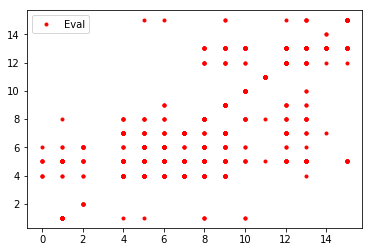

In [36]:
from sklearn import svm
standard = StandardScaler(with_mean=True,with_std=True)
pca = PCA(n_components=450)
classifier6 = svm.SVC()
pipeline6 = Pipeline(steps=[('standardizer',standard),('PCA',pca),('SVC',classifier6)])
model6=pipeline6.fit(train_X,train_Y)
prediction6 = model6.predict(eval_X)
pyplot.plot(eval_Y, prediction6 ,'r.',label='Eval')
pyplot.legend()
pyplot.show()



In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction6)

0.80348652931854203

from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction6)


0.80348652931854203

In [38]:
import pickle
# Save i t t o a f i l e
with open('/tmp/model_SVC','wb') as writer:
    pickle.dump(model6,writer)


In [2]:
import pickle
# Load i t from a f i l e
with open('/tmp/model_SVC','rb') as reader:
    loaded2=pickle.load(reader)
print ('2) Loaded model: %s'% loaded2 )

2) Loaded model: Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


In [ ]:
from sklearn import svm
standard = StandardScaler(with_mean=True,with_std=True)
pca = PCA(n_components=450)
classifier7 = svm.SVC(cache_size=3000)
pipeline7 = Pipeline(steps=[('standardizer',standard),('PCA',pca),('SVC',classifier7)])
C_range = [1,2]
params={'SVC__C': C_range}
clf = GridSearchCV(estimator=pipeline7,param_grid=params,n_jobs=4,verbose=True,cv=5)
model7=clf.fit(train_X,train_Y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
prediction7 = model7.predict(eval_X)
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction7)


In [11]:
from sklearn import svm
standard = StandardScaler(with_mean=True,with_std=True)
pca = PCA(n_components=450)
classifier8 = svm.SVC(cache_size=3000)
pipeline8 = Pipeline(steps=[('standardizer',standard),('PCA',pca),('SVC',classifier8)])
pipeline8.get_params()

{'PCA': PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': 450,
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'SVC': SVC(C=1.0, cache_size=3000, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'SVC__C': 1.0,
 'SVC__cache_size': 3000,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'auto',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False,
 'memory': None,
 'standardizer': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardizer__copy': 

In [6]:
C_range = np.logspace(-3, 3, 3)
gamma_range = np.logspace(-9, 3, 3)
params={'SVC__C': C_range,'SVC__gamma': gamma_range}
clf = GridSearchCV(estimator=pipeline8,param_grid=params,n_jobs=4,verbose=True,cv=5)
model8=clf.fit(train_X,train_Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed: 194.6min finished


In [9]:
prediction8 = model8.predict(eval_X)
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction8)




0.91354111639373126

Fitting 5 folds for each of 9 candidates, totalling 45 fits

[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed: 194.6min finished

prediction8 = model8.predict(eval_X)

from sklearn.metrics import accuracy_score

accuracy_score(eval_Y, prediction8)

0.91354111639373126

In [11]:
import pickle
with open('/home/agu/model8','wb') as writer:
    pickle.dump(model8,writer)

In [14]:
model8.get_params()

{'cv': 5, 'error_score': 'raise', 'estimator': Pipeline(memory=None,
      steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=3000, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))]), 'estimator__PCA': PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False), 'estimator__PCA__copy': True, 'estimator__PCA__iterated_power': 'auto', 'estimator__PCA__n_components': 450, 'estimator__PCA__random_state': None, 'estimator__PCA__svd_solver': 'auto', 'estimator__PCA__tol': 0.0, 'estimator__PCA__whiten': False, 'estimator__SVC': SVC(C=1.0, cache_size=3000, class_weight=None, coef0=0.0,
   decisio

In [16]:
model8.best_estimator_

Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1000.0, cache_size=3000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [19]:
model8.best_estimator_.get_params()

{'PCA': PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': 450,
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'SVC': SVC(C=1000.0, cache_size=3000, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'SVC__C': 1000.0,
 'SVC__cache_size': 3000,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 0.001,
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False,
 'memory': None,
 'standardizer': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardizer__cop

In [22]:
model8.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=450, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=3000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'SVC__C': array([  1.00000e-03,   1.00000e+00,   1.00000e+03]), 'SVC__gamma': array([  1.00000e-09,   1.00000e-03,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)>

In [25]:
model8.cv_results_

{'mean_fit_time': array([  435.04920835,   459.55843973,   571.26157351,   436.53191895,
          262.39286113,  1234.29831853,   455.45709143,   295.81669788,
         1181.43104949]),
 'mean_score_time': array([ 79.30365663,  78.87064323,  87.62363448,  78.96449246,
         57.33585582,  84.26474333,  81.0529386 ,  62.36662021,  76.54868803]),
 'mean_test_score': array([ 0.30169611,  0.30169611,  0.30169611,  0.30169611,  0.76140258,
         0.30327797,  0.30213551,  0.84137446,  0.30327797]),
 'mean_train_score': array([ 0.30169612,  0.30169612,  0.30169612,  0.30169612,  0.84721907,
         1.        ,  0.30224543,  0.99993409,  1.        ]),
 'param_SVC__C': masked_array(data = [0.001 0.001 0.001 1.0 1.0 1.0 1000.0 1000.0 1000.0],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'param_SVC__gamma': masked_array(data = [1.0000000000000001e-09 0.001 1000.0 1.0000000000000001e-09 0.001 1000.0
  1.0000000000000001e-09 0.001 10

In [7]:
import pickle
with open('/home/agu/model8','rb') as reader:
    loaded3=pickle.load(reader)

prediction8 = loaded3.predict(eval_X)
from sklearn.metrics import accuracy_score
accuracy_score(eval_Y, prediction8)

0.91354111639373126

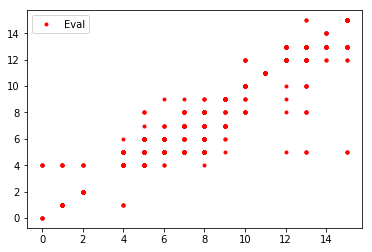

In [9]:
pyplot.plot(eval_Y, prediction8 ,'r.',label='Eval')
pyplot.legend()
pyplot.show()

In [15]:
C_range = np.logspace(-3, 3, 3)
gamma_range = np.logspace(-9, 3, 3)
decision_function_shape = ['ovo']
params={'SVC__C': C_range,'SVC__gamma': gamma_range,'SVC__decision_function_shape': decision_function_shape}
clf = GridSearchCV(estimator=pipeline8,param_grid=params,n_jobs=4,verbose=True,cv=5)
model9=clf.fit(train_X,train_Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: 